In [464]:
import os
import sys
while not os.getcwd().endswith('ml'):
    os.chdir('..')
sys.path.insert(0, os.getcwd())

In [465]:
import kaggle_problems.rosneft_proppant.RPCC_metric_utils_for_participants as metrics
from kaggle_problems.rosneft_proppant.workspace.common import bins_dict
import pandas as pd
import numpy as np
import copy
from matplotlib import pyplot as plt

In [466]:
predicted = pd.read_csv("kaggle_problems/rosneft_proppant/workspace/answers.csv")
train = pd.read_csv("kaggle_problems/rosneft_proppant/workspace/data/labels/labels.csv")

In [460]:
predicted.ImageId.unique()

array([ 41,  42,  47,  73, 100, 112, 151, 152, 179, 191, 214, 215, 227,
       237, 308, 348, 416, 424, 440, 492, 496, 524, 553, 592, 616, 655,
       714])

In [422]:
imgs = train[np.logical_and(~train.prop_count.isnull(), ~train['16'].isnull())]['ImageId'].to_numpy()

In [423]:
print([str(i) + ".jpg"  for i in train[np.logical_and(~train.prop_count.isnull(), ~train['16'].isnull())]['ImageId'].to_numpy()])

['41.jpg', '42.jpg', '47.jpg', '53.jpg', '73.jpg', '100.jpg', '112.jpg', '151.jpg', '152.jpg', '179.jpg', '191.jpg', '214.jpg', '215.jpg', '227.jpg', '237.jpg', '265.jpg', '308.jpg', '348.jpg', '382.jpg', '416.jpg', '424.jpg', '440.jpg', '492.jpg', '496.jpg', '524.jpg', '553.jpg', '592.jpg', '616.jpg', '655.jpg', '714.jpg']


In [424]:
train = train[train.ImageId == 41]
predicted = predicted[predicted.ImageId == 41]

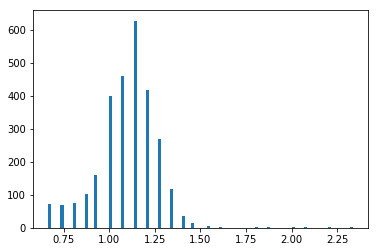

In [425]:
plt.hist(predicted.prop_size.values, bins=100)
plt.show()

In [426]:
print(len(predicted))

2842


In [427]:
train[~train.prop_count.isnull()]

,ImageId,6,7,8,10,12,14,16,18,20,...,40,45,50,60,70,80,100,pan,prop_count,fraction
40,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0212,0.4803,0.4557,...,0.0002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2835.0,16/20


In [461]:
# best_mi_c = []
# for img in [ 41,  42,  47,  73, 100, 112, 151, 152, 179, 191, 214, 215, 227, 237, 308, 348, 416, 424, 440, 492, 496, 524, 553, 592, 616, 655, 714]:

#     print(img)
#     predicted = pd.read_csv("kaggle_problems/rosneft_proppant/workspace/answers.csv")
#     train = pd.read_csv("kaggle_problems/rosneft_proppant/workspace/data/labels/labels.csv")

#     train = train[train.ImageId == img]
#     predicted = predicted[predicted.ImageId == img]

#     mi = 10
#     mi_c = -1
#     for c in np.arange(0.5, 1., 0.01):
#         _predicted = copy.deepcopy(predicted)
#         _predicted['prop_size'] *= c;
#         res = metrics.contest_metric(train, _predicted)
#         if (mi > res[0]):
#             mi = res[0]
#             mi_c = c;
#     best_mi_c.append(mi_c)

41
42
47
73
100
112
151
152
179
191
214
215
227
237
308
348
416
424
440
492
496
524
553
592
616
655
714


In [463]:
print(np.mean(best_mi_c))

0.780740740740741


In [469]:
predicted.prop_size *= 0.78
metrics.contest_metric(train, predicted)

(0.05472041894605728, 0.06030080849243959, 0.046349834626483816)

In [374]:
(2200 ** 2 + 200 ** 2) ** 0.5

2209.072203437452

In [375]:
2209 / 143

15.447552447552448

In [377]:
15 / (15.447552447552448)

0.9710276143051154

In [378]:
29 / 30

0.9666666666666667

In [358]:
print(mi, mi_c)

0.022608490303457754 0.7799999999999997


In [333]:
# Для 714 картинки - 0.72 коеффицент
# Для 41 картинки - 0.78 
# Для 592 картинки - 0.82